In [196]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cmath as cm

In [197]:
# 512 Point means: 512 points in 1 cycle (0-1 range)
# If the range is (0,0.025) then there is 12.8 ~ 13 points

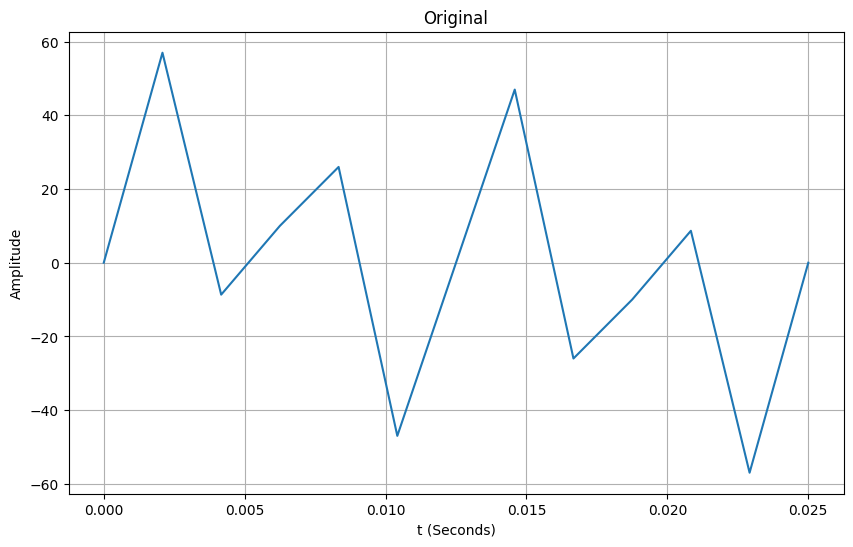

In [198]:
t = np.linspace(0,0.025,13)
y = 10 * np.sin(2 * np.pi * 40 * t) + 20 * np.sin(2 * np.pi * 80 * t) + 40 * np.sin(2 * np.pi * 160 * t)

plt.figure(figsize=(10,6))
plt.plot(t, y)
plt.title("Original")
plt.ylabel("Amplitude")
plt.xlabel("t (Seconds)")
plt.grid()

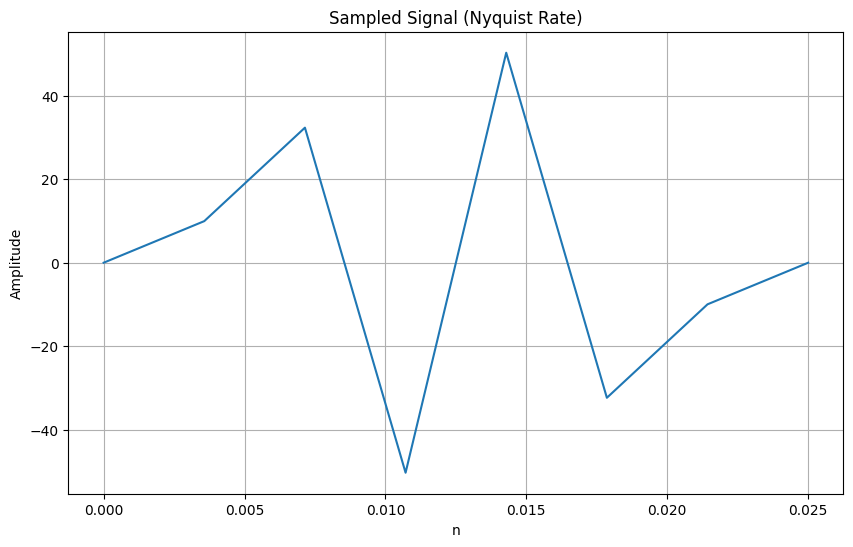

In [199]:
fs = 8  # 320 * 0.025 
n_nyquist = np.linspace(0, 0.025, fs)
y_nyquist = 10 * np.sin(2 * np.pi * 40 * t_nyquist) + 20 * \
    np.sin(2 * np.pi * 80 * t_nyquist) + 40 * \
    np.sin(2 * np.pi * 160 * t_nyquist)

plt.figure(figsize=(10, 6))
plt.plot(t_nyquist, y_nyquist)
plt.title("Sampled Signal (Nyquist Rate)")
plt.ylabel("Amplitude")
plt.xlabel("n")
plt.grid()

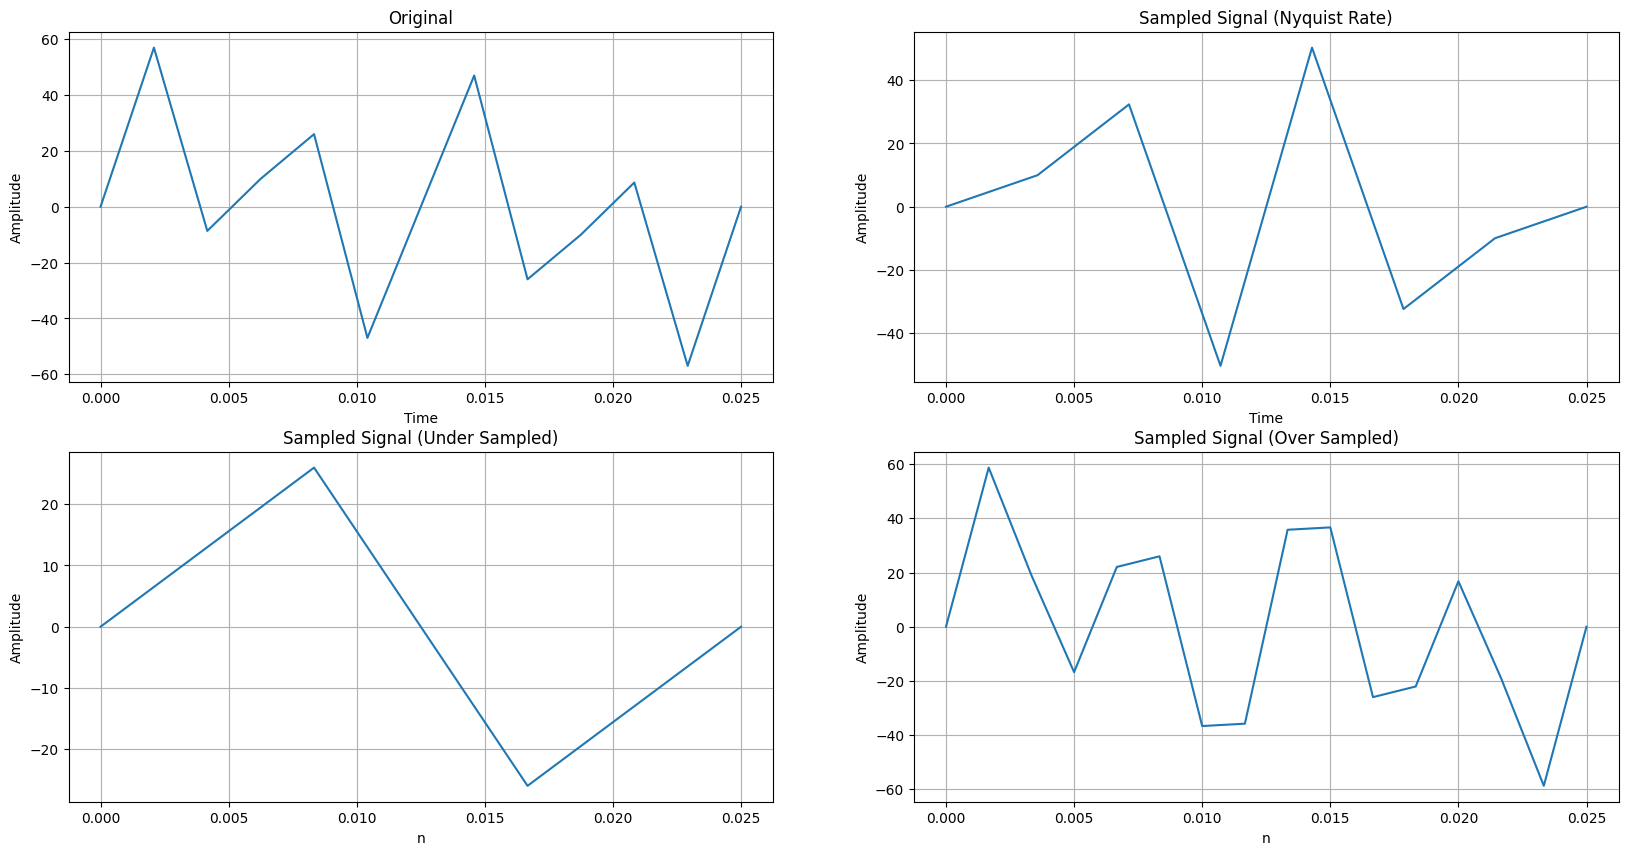

In [200]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.plot(t,y)
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.title("Original")
plt.grid()

plt.subplot(2, 2, 2)
plt.plot(n_nyquist, y_nyquist)
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.title("Sampled Signal (Nyquist Rate)")
plt.grid()


# Under Sampled
fs = 4
n_under = np.linspace(0, 0.025, fs)
y_under = 10 * np.sin(2 * np.pi * 40 * n_under) + 20 * \
    np.sin(2 * np.pi * 80 * n_under) + 40 * \
    np.sin(2 * np.pi * 160 * n_under)


plt.subplot(2, 2, 3)
plt.plot(n_under, y_under)
plt.title("Sampled Signal (Under Sampled)")
plt.ylabel("Amplitude")
plt.xlabel("n")
plt.grid()


# Over Sampled
fs = 16
n_over = np.linspace(0, 0.025, fs)
y_over = 10 * np.sin(2 * np.pi * 40 * n_over) + 20 * \
    np.sin(2 * np.pi * 80 * n_over) + 40 * \
    np.sin(2 * np.pi * 160 * n_over)

plt.subplot(2, 2, 4)
plt.plot(n_over, y_over)
plt.ylabel("Amplitude")
plt.xlabel("n")
plt.title("Sampled Signal (Over Sampled)")
plt.grid()

In [201]:
def dft(x):
    N = len(x)
    X = np.zeros(N, dtype=np.complex128)
    for m in range(N):
        for n in range(N):
            X[m] += x[n] * np.exp(-2j * np.pi * m * n / N)
    return X

In [202]:
def get_phases(x):
    phases = []
    for i in x:
        temp = cm.phase(round(i.real, 3) + round(i.imag, 3) * 1j)
        phases.append(math.degrees(temp))
    return phases

In [203]:
N = 13 # All other dft we create on 13 points
fs = 512
t = np.arange(0,1,1/fs)
y = 10 * np.sin(2 * np.pi * 40 * t) + 20 * np.sin(2 * np.pi * 80 * t) + 40 * np.sin(2 * np.pi * 160 * t)
y_dft = dft(y)
y_phases = get_phases(y_dft)

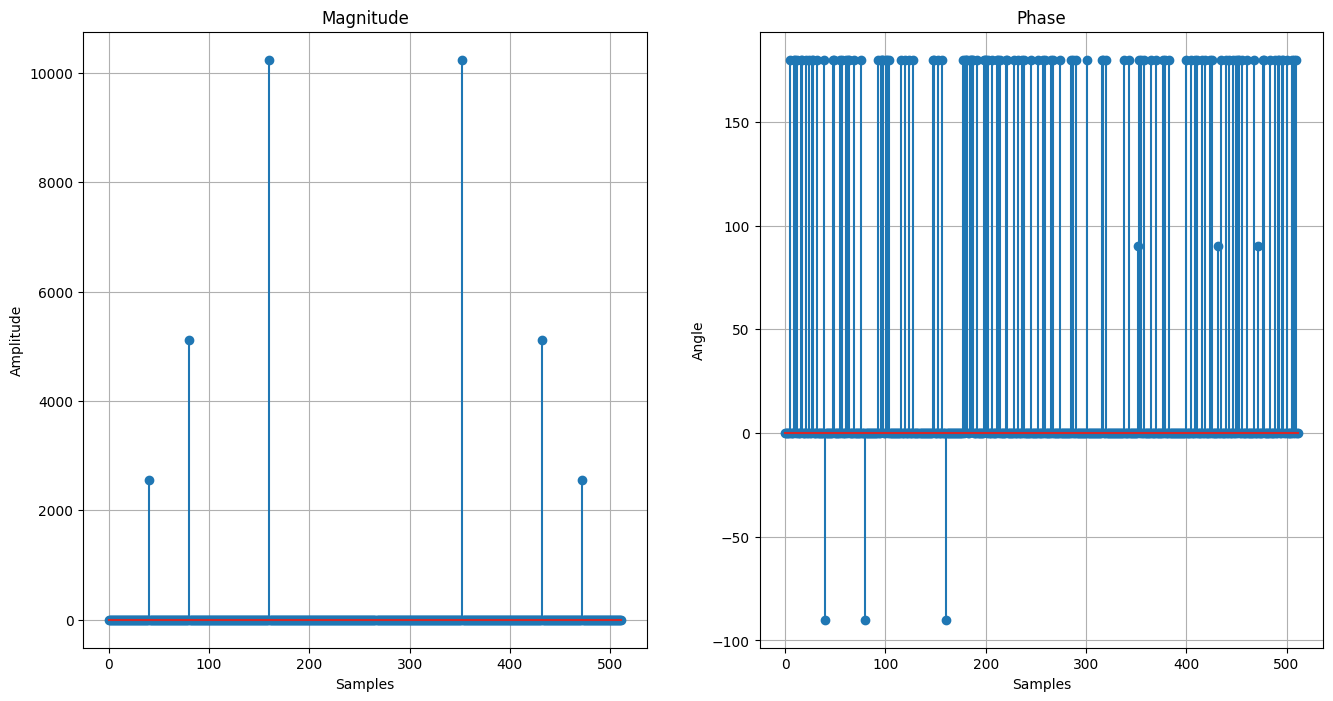

In [204]:
plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
plt.stem(range(len(y_dft)), np.abs(y_dft))
plt.ylabel("Amplitude")
plt.xlabel("Samples")
plt.title("Magnitude")
plt.grid()

plt.subplot(1, 2, 2)
plt.stem(range(len(y_phases)), y_phases)
plt.ylabel("Angle")
plt.xlabel("Samples")
plt.title("Phase")
plt.grid()